In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model

In [3]:
# Load the data
df = pd.read_csv('FuelConsumptionCo2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
np.unique(df['MAKE'])

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [11]:
df['MAKE'].value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
JAGUAR           22
LEXUS            22
HONDA            21
INFINITI         21
CHRYSLER         19
LAND ROVER       19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
VOLVO            11
LINCOLN          11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [12]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [17]:
motors = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
print(motors.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


In [18]:
X_train, X_test, y_train, y_test = train_test_split(motors, co2, test_size=0.2, random_state=42)
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


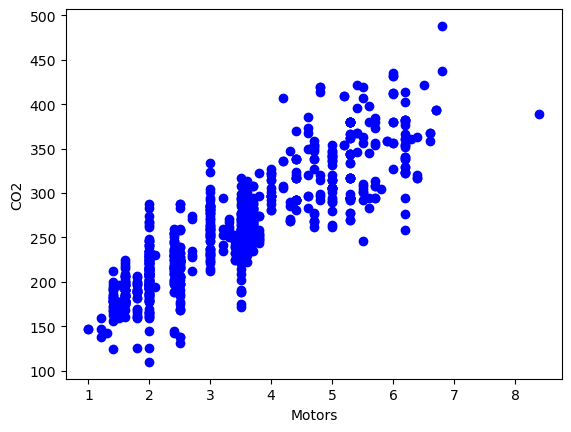

In [21]:
plt.scatter(X_train, y_train, color='blue')
plt.xlabel("Motors")
plt.ylabel("CO2")
plt.show()

In [23]:
model = linear_model.LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
print('(A) Intercepto: ', model.intercept_)
print('(B) Inclinação: ', model.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


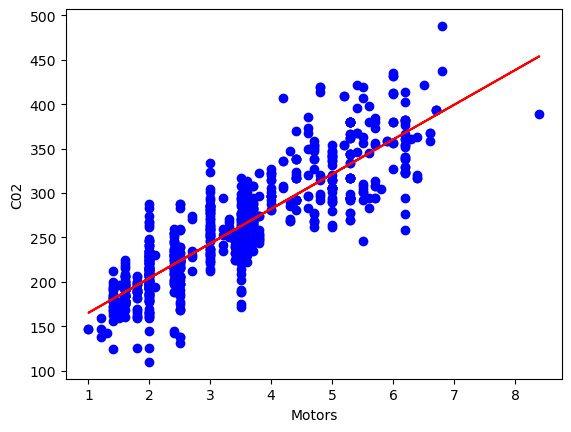

In [28]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Motors")
plt.ylabel("C02")
plt.show()
     

In [29]:
predictions = model.predict(X_test)

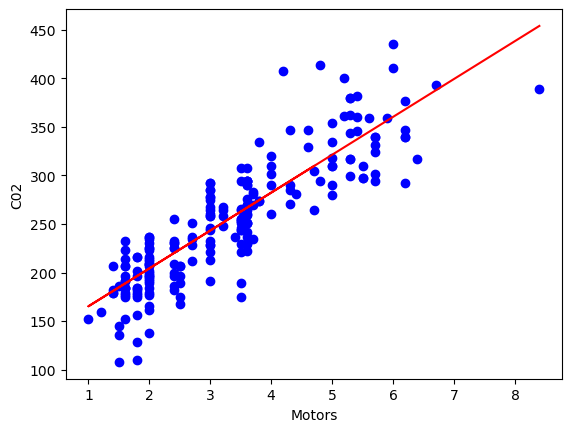

In [30]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, model.coef_[0][0]*X_test + model.intercept_[0], '-r')
plt.xlabel("Motors")
plt.ylabel("C02")
plt.show()

In [31]:
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predictions - y_test)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y_test, predictions))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y_test, predictions))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(y_test, predictions)))
print("R2-score: %.2f" % r2_score(predictions , y_test) )
     


Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
